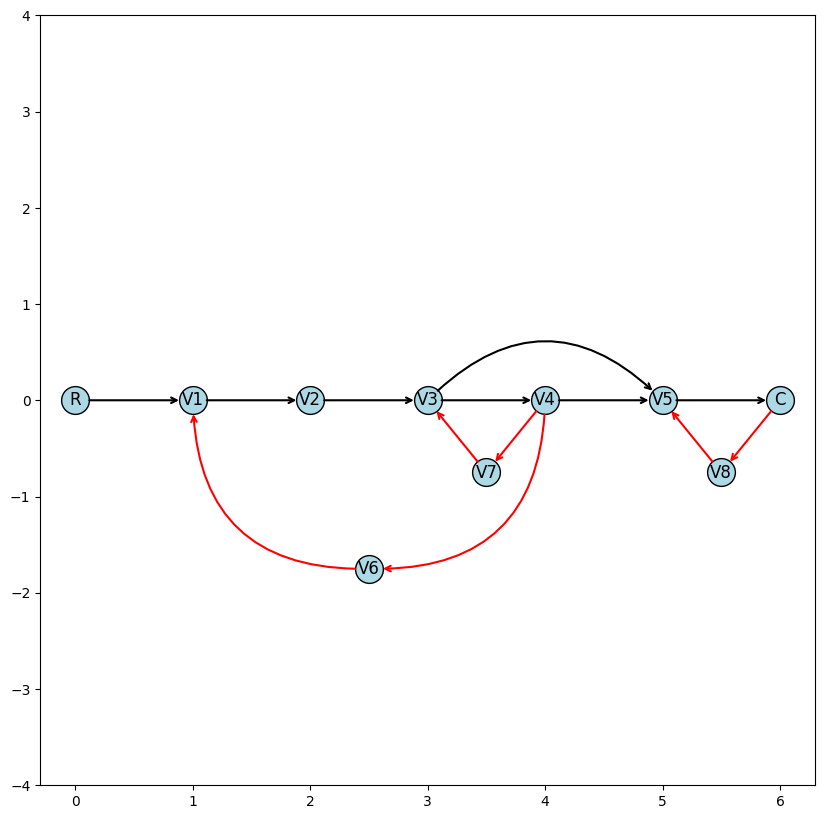

In [1]:
import matplotlib.pyplot as plt

# Vai ser o len(matriz)
matriz = [
    #R  1  2  3  4  5  6  7  8  C
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], # R
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], # V1
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], # v2 
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0], # v3
    [0, 0, 0, 0, 0, 1, 1, 1, 0, 0], # v4
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], # v5
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], # v6
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], # v7
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 1], # v8
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]  # C
]

# Guarda o indice do maior caminho a frente 
# Entrada: __encontra_caminho()
caminhos_frente = [[0, 1, 2, 3, 5, 9], [0, 1, 2, 3, 4, 5, 9]]
# encontra o indice do maior comprimento
ignora = max(range(len(caminhos_frente)), key=lambda i: len(caminhos_frente[i]))
# encontra o tamanho do maior indice
max_len = len(caminhos_frente[ignora])
# conta a quantidade de caminhos de maior tamanho possuem
conta_caminhos = sum(1 for caminho in caminhos_frente if len(caminho) == max_len)

'''
Precisa fazer com que se encontrar mais de um caminho, sorteie esse caminho entre os dois valores
'''

# Cria os nós
nos = []
# Preenche os nós
for i in range(len(matriz)):
    # Nó R
    if i == 0:
        nos.append('R')
    # Nó C
    elif i == len(matriz) - 1:
        nos.append('C')
    # Nós V
    else:
        nos.append('V' + str(i))

#------------------------------------------------------------------------------------#
#----------------------------------- Pesos em X -------------------------------------#
# Aplica os pesos em X
pesos_x = len(matriz)*[-1]
# [-1,- 1,- 1, ..., -1]

# Muda os valores se eles estiverem no caminho principal
for index, value in enumerate(caminhos_frente[ignora]):
    pesos_x[value] = index
# [0, 1, 2, 3, 4, 5, -1, -1, -1, 6]

# Para o caso de um segundo caminho a frente de mesmo tamanho com um indice
for index, value in enumerate(caminhos_frente):
    if index != ignora:
        dif = list(set(caminhos_frente[index]) - set(caminhos_frente[ignora]))
        if dif == list():
            continue
        else:
            for i in value:
                if i == dif[0]:
                    anterior = value[i-1]
                    posterior = value[i+1]
                    pesos_x[i] = (anterior + posterior) / 2

# [[1, 2, 3, 4, 6, 1], [3, 4, 7, 3], [5, 9, 8, 5]]
# Vai ser os ganhos de laços
ganhos_lacos = [[1, 2, 3, 4, 6, 1], [3, 4, 7, 3], [5, 9, 8, 5]]
for index, value in enumerate(ganhos_lacos):
    dif = list(set(ganhos_lacos[index]) - set(caminhos_frente[ignora]))
    # primeiro = ganhos_lacos[index][0]
    primeiro = pesos_x[ganhos_lacos[index][0]]
    for ind, i in enumerate(value):
        if i == dif[0] or ind == len(value) - 1:
            continue
        ultimo = pesos_x[i]
    pesos_x[dif[0]] = (primeiro + ultimo) / 2 
#------------------------------------------------------------------------------------#
#----------------------------------- Pesos em Y -------------------------------------#
pesos_y = len(matriz)*[None]
# Preenche pesos_y

# Aplica os pesos em Y
for i in caminhos_frente[ignora]:
    pesos_y[i] = 0
# [0, 0, 0, 0, 0, -1, -1, -1, 0]

c = 0.5
for index, value in enumerate(ganhos_lacos):
    dif = list(set(ganhos_lacos[index]) - set(caminhos_frente[ignora]))
    # primeiro = pesos_y[ganhos_lacos[index][0]]
    for ind, i in enumerate(value):
        if i == dif[0] or ind == len(value) - 1:
            continue
        c -= 1
        # ultimo = pesos_y[i]
    pesos_y[dif[0]] = c / 2
    c = 0.5
               
# Caminho do mesmo tamanho do maior, porém com outros indices
for index, value in enumerate(caminhos_frente):
    if index != ignora and len(caminhos_frente[index]) == max_len:
        dif = list(set(caminhos_frente[index]) - set(caminhos_frente[ignora]))
        if dif != None:
            for i in dif:
                pesos_y[i] == 1        
#------------------------------------------------------------------------------------#
#----------------------Cria o dicionário das posições--------------------------------#
pos = {}
for i in range(len(nos)):
    pos[nos[i]] = (pesos_x[i], pesos_y[i])
#------------------------------------------------------------------------------------#
#---------------------------Cria e plota os gráficos---------------------------------#
# Criar a figura e remove os eixos
fig, ax = plt.subplots(figsize=(10, 10))
plt.ylim(-4,4) # Colocar o menor e maior peso para y
# ax.set_axis_off()

def draw_arrow(ax, start, end, color='black', curvature=0, transparencia=1): # Mudar a transparencia dependendo se vai ser mostrado algo ou não
    ax.annotate('', xy=end, xycoords='data', xytext=start, textcoords='data',
                arrowprops=dict(arrowstyle="->", lw=1.5, color=color, shrinkA=10, shrinkB=10, connectionstyle=f"arc3,rad={curvature}", alpha=transparencia))

# Desenha linhas entre os nós do caminho a frente
for i in range(len(matriz)):
    for j in range(len(matriz[i])):
        if j > i:
            if matriz[i][j] == 1:  # Se há uma ligação
                start = pos[nos[i]]
                end = pos[nos[j]]
                curvature = -0.5 if abs(start[0] - end[0]) > 1 else 0  # Desenha as ligações para os nós de caminho a frente
                if i < len(matriz) - 2:
                    if start[0] <= end[0]:
                        color='black' # Ligação para caminho a frente
                    else:
                        color='red' # Ligação para realimentação
                    draw_arrow(ax, start, end, color, curvature=curvature) # Colocar a transparencia

# Desenha linhas entre os nós de realimentação
for i in range(len(matriz)):
    for j in range(len(matriz[i])):
        if i > j:
            if matriz[i][j] == 1:  # Se há uma ligação
                start = pos[nos[i]]
                end = pos[nos[j]]
                curvature = -0.5 if abs(start[0] - end[0]) > 1 else 0  # Ajusta a curvatura com base na diferença de X
                if start[0] <= end[0]:
                    color='black' # Ligação para caminho a frente
                else:
                    color='red' # Ligação para realimentação
                draw_arrow(ax, start, end, color, curvature=curvature) # Colocar a transparência

# Desenha os nós
for label, (x, y) in pos.items():
    ax.scatter(x, y, s=400, color='lightblue', edgecolor='black', zorder=1, alpha=1)  # Ponto do nó => O alpha define a
    ax.text(x, y, label, ha='center', va='center', fontsize=12, zorder=1, alpha=1)  # Rótulo do nó



# Usuario escolhe o que vai ser mostrado:
# Se for uma realimentação escolhida:""

plt.show()